# Домашнее задание №2: Архитектуры CNN

**[0 баллов] Считайте изображение и получите три вариации изображения: HR, LR и ILR .**

In [1]:
# скачаем изображение
!wget -O hr.png https://github.com/aiedu-courses/super_resolution/blob/main/data/hr.png?raw=true

--2024-04-29 14:40:49--  https://github.com/aiedu-courses/super_resolution/blob/main/data/hr.png?raw=true
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/aiedu-courses/super_resolution/raw/main/data/hr.png [following]
--2024-04-29 14:40:49--  https://github.com/aiedu-courses/super_resolution/raw/main/data/hr.png
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/aiedu-courses/super_resolution/main/data/hr.png [following]
--2024-04-29 14:40:49--  https://raw.githubusercontent.com/aiedu-courses/super_resolution/main/data/hr.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HT

In [22]:
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt
from torch import nn
import torch

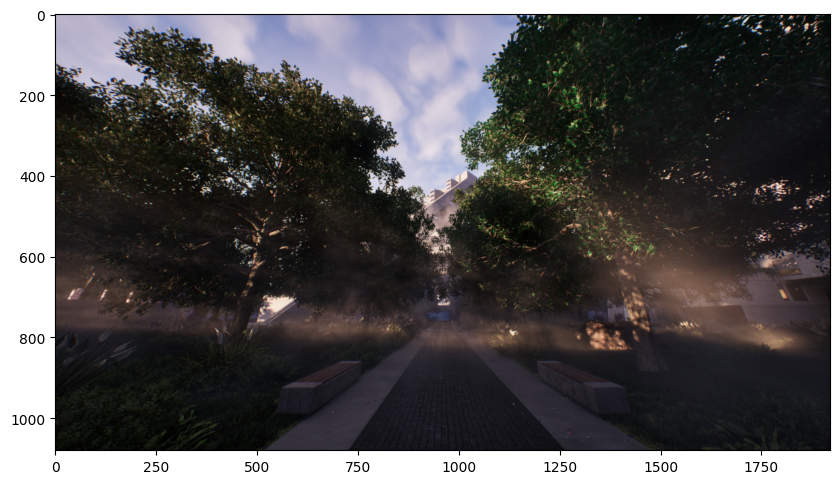

In [27]:
# считаем изображение при помощи библиотеки pillow и приведем к RGB формату
hr_img = Image.open("hr.png").convert("RGB")
_ = plt.figure(figsize=(10, 7))
_ = plt.imshow(hr_img)

In [25]:
# случайным образом получим HR изображение размера (256, 256)
transform = transforms.Compose(
    [
        transforms.ToTensor(),
        transforms.RandomCrop((256, 256))
    ]
)

# получим LR изображение размера (64, 64) при помощи простого resize
resize_transform1 = transforms.Resize((64, 64))

# для SRCNN и VDSR нам нужно получить ILR
resize_transform2 = transforms.Resize((256, 256))

# tensor to PIL
tensor2pil = transforms.ToPILImage()

In [28]:
hr_img = transform(hr_img)
lr_img = resize_transform1(hr_img)
ilr_img = resize_transform2(lr_img)

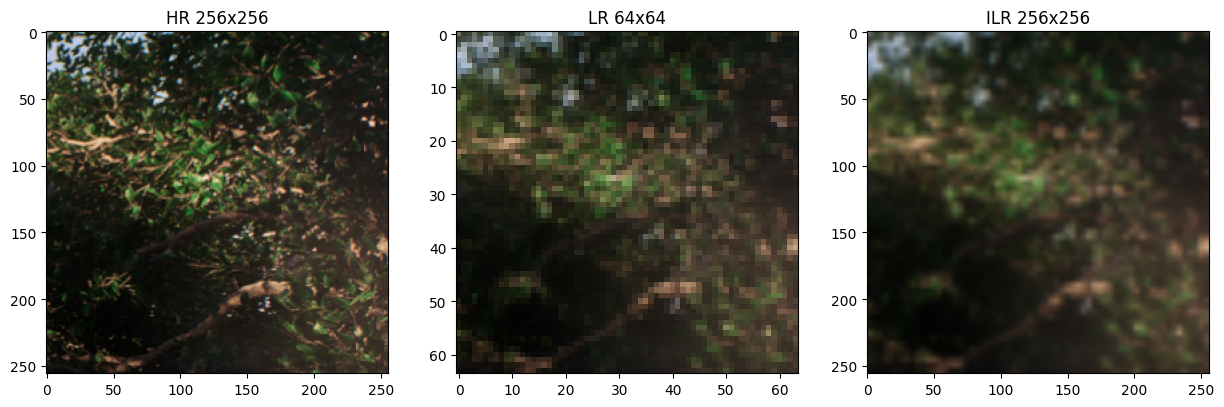

In [29]:
fig, ax = plt.subplots(1, 3, figsize=(15, 10))

ax[0].imshow(tensor2pil(hr_img))
ax[0].set_title("HR 256x256")

ax[1].imshow(tensor2pil(lr_img))
ax[1].set_title("LR 64x64")

ax[2].imshow(tensor2pil(ilr_img))
ax[2].set_title("ILR 256x256")

plt.show()

In [30]:
hr_img = hr_img.unsqueeze(0)
lr_img = lr_img.unsqueeze(0)
ilr_img = ilr_img.unsqueeze(0)

### **[2 балла] Подсчет параметров модели**

In [35]:
# реализуйте объявленную функцию
def calculate_total_parameters(model: nn.Module) -> int:
    """
        Parameters
        ----------
        model: nn.Module
            Объект PyTorch модели.

        Returns
        -------
        int
            Число всех параметров модели.
    """
    ...

### **[6 баллов] SRCNN**

In [36]:
# реализуйте объявленные методы класса
class SRCNN(nn.Module):
    def __init__(self, nchannels: int = 3) -> None:
        """
            Parameters
            ----------
            nchannels: int
                Количество каналов входного изображения.

            Returns
            -------
            None
        """
        super().__init__()
        ...

    def forward(self, x: torch.FloatTensor) -> torch.FloatTensor:
        """
            Parameters
            ----------
            x: torch.FloatTensor
                Входной тензор формата (bs, c, h, w).

            Returns
            -------
            torch.FloatTensor
                Выходной тензор, получается путем применения слоев к входному тензору.
        """
        ...

In [ ]:
# создадим модель и напечатаем ее архитектуру
model = ...
model

In [ ]:
# посчитаем количество параметров модели
print(f"SRCNN parameters = {...}")

In [38]:
# проверка на корректность размерностей
assert model(ilr_img).shape == (1, 3, 256, 256)

### **[8 баллов] VDSR**

In [54]:
# реализуйте объявленные методы класса
class ConvReLU(nn.Module):
    def __init__(self) -> None:
        """
            Блок, состоящий из свертки и функции активации ReLU.

            Returns
            -------
            None
        """
        super().__init__()
        ...

    def forward(self, x: torch.FloatTensor) -> torch.FloatTensor:
        """
            Parameters
            ----------
            x: torch.FloatTensor
                Входной тензор формата (bs, c, h, w).

            Returns
            -------
            torch.FloatTensor
                Выходной тензор, получается путем применения слоев к входному тензору.
        """
        ...

In [59]:
# реализуйте объявленные методы класса
class VDSR(nn.Module):
    def __init__(self, nchannels: int = 3, nblocks: int = 18) -> None:
        """
            Parameters
            ----------
            nchannels: int
                Количество каналов входного изображения.
            nblocks: int
                Количество ConvReLU блоков, не включает первую и последнюю свертку.

            Returns
            -------
            None
        """
        super().__init__()
        ...

    def forward(self, x: torch.FloatTensor) -> torch.FloatTensor:
        """
            Parameters
            ----------
            x: torch.FloatTensor
                Входной тензор формата (bs, c, h, w).

            Returns
            -------
            torch.FloatTensor
                Выходной тензор, получается путем применения слоев к входному тензору.
        """
        ...

In [ ]:
# создадим модель и напечатаем ее архитектуру
model = ...
model

In [ ]:
# посчитаем количество параметров модели
print(f"VDSR parameters = {...}")

In [62]:
# проверка на корректность размерностей
assert model(ilr_img).shape == (1, 3, 256, 256)

### **[8 баллов] EDSR**

In [65]:
# реализуйте объявленные методы класса
class ResBlock(nn.Module):
    def __init__(self, nfeatures: int, residual_scaling: float = 1.0) -> None:
        """
            Модифицированный residual блок.

            Parameters
            ----------
            nfeatures: int
                Количество feature map, т.е. количество входных и выходных каналов.
            residual_scaling: float
                Коэффициент на который умножается выход слоя перед сложением с выходом предыдущего слоя.

            Returns
            -------
            None
        """
        super().__init__()
        ...

    def forward(self, x: torch.FloatTensor) -> torch.FloatTensor:
        """
            Parameters
            ----------
            x: torch.FloatTensor
                Входной тензор формата (bs, c, h, w).

            Returns
            -------
            torch.FloatTensor
                Выходной тензор, получается путем применения слоев к входному тензору.
        """
        ...

In [75]:
# реализуйте объявленные методы класса
class UpsampleBlock(nn.Module):
    def __init__(self, factor: int, nfeatures: int) -> None:
        """
            Parameters
            ----------
            factor: int
                Коэффициент увеличения [2|3|4].
            nfeatures: int
                Количество feature map, т.е. количество входных и выходных каналов.

            Returns
            -------
            None
        """
        super().__init__()
        ...

    def forward(self, x: torch.FloatTensor) -> torch.FloatTensor:
        """
            Parameters
            ----------
            x: torch.FloatTensor
                Входной тензор формата (bs, c, h, w).

            Returns
            -------
            torch.FloatTensor
                Выходной тензор, получается путем применения слоев к входному тензору.
        """
        ...

In [77]:
# реализуйте объявленные методы класса
class EDSR(nn.Module):
    def __init__(
            self,
            nchannels: int = 3,
            nblocks: int = 32,
            nfeatures: int = 256,
            residual_scaling: float = 0.1,
            scale: int = 4,
        ) -> None:
        """
            Parameters
            ----------
            nchannels: int
                Количество каналов входного изображения.
            nblocks: int
                Количество ResBlock блоков.
            nfeatures: int
                Количество входных и выходных каналов промежуточных слоев.
            residual_scaling: float
                Коэффициент residual scaling для блоков ResBlock.
            scale: int
                Коэффициент увеличения [2|3|4].

            Returns
            -------
            None
        """
        super().__init__()
        ...

    def forward(self, x: torch.FloatTensor) -> torch.FloatTensor:
        """
            Parameters
            ----------
            x: torch.FloatTensor
                Входной тензор формата (bs, c, h, w).

            Returns
            -------
            torch.FloatTensor
                Выходной тензор, получается путем применения слоев к входному тензору.
        """
        ...

In [ ]:
# создадим модель и напечатаем ее архитектуру
model = ...
model

In [ ]:
# посчитаем количество параметров модели
print(f"EDSR parameters = {...}")

In [82]:
# проверка на корректность размерностей
assert model(lr_img).shape == (1, 3, 256, 256)

### **[1 балл] Feedback**

Напишите ваши эмоции от этого домашнего задания, было ли оно интересным, оцените сложность, затраты по времени и т.п., все что пожелаете :)